## IMPORT LIBRARY

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## MEMBACA DAN KONVERSI CITRA

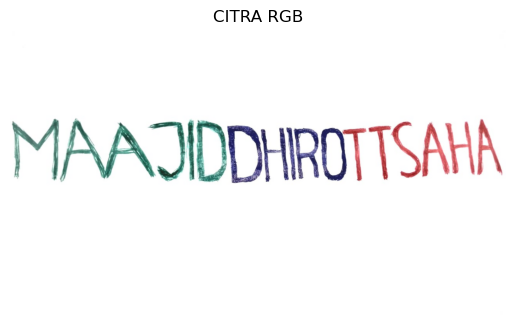

In [5]:
img_bgr = cv2.imread('photo1.jpeg')  # Ganti dengan nama file kamu
if img_bgr is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("CITRA RGB")
plt.axis('off')
plt.show()


## KONVERSI CITRA GRAYSCALE & HSV

In [8]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)


## DETEKSI MASK WARNA

In [11]:
ranges = {
    'blue':  (np.array([100, 50, 50]), np.array([140, 255, 255])),
    'green': (np.array([30, 40, 40]), np.array([100, 255, 255])),
    'red1':  (np.array([0, 50, 50]), np.array([10, 255, 255])),
    'red2':  (np.array([160, 50, 50]), np.array([180, 255, 255]))
}

mask_blue = cv2.inRange(hsv, *ranges['blue'])
mask_green = cv2.inRange(hsv, *ranges['green'])
mask_red = cv2.inRange(hsv, *ranges['red1']) + cv2.inRange(hsv, *ranges['red2'])


## FUNGSI HIGHLIGHT TEKS BERDASARKAN MASK

In [14]:
def highlight(gray_img, mask):
    out = gray_img.copy()
    out[mask > 0] = 255
    return out

h_blue = highlight(gray, mask_blue)
h_green = highlight(gray, mask_green)
h_red = highlight(gray, mask_red)

## TAMPILKAN HASIL HIGHLIGHT WARNA

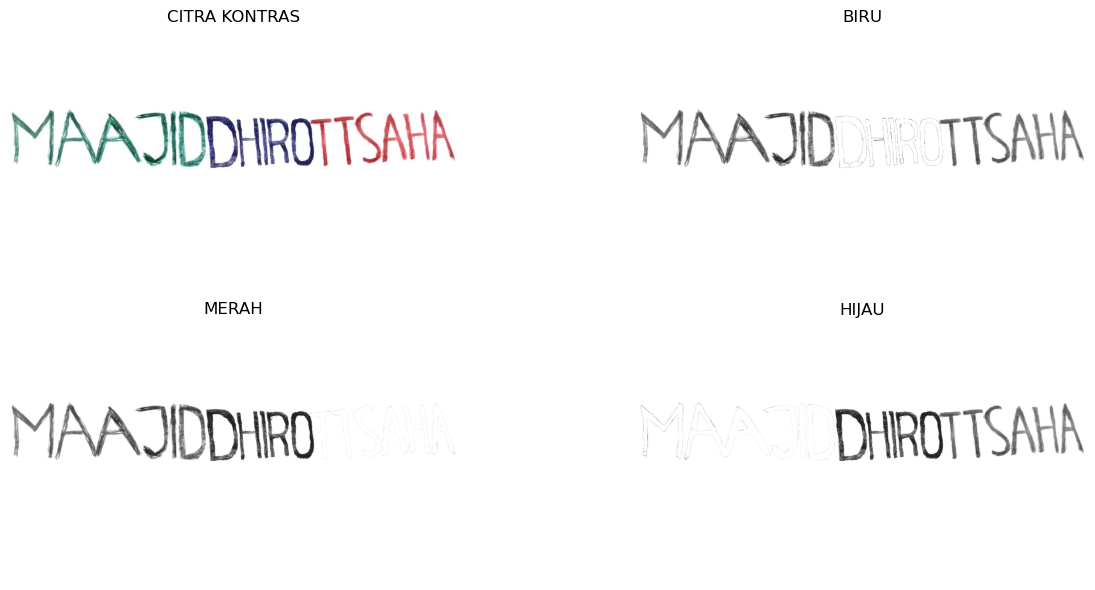

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 6))

axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title('CITRA KONTRAS')
axs[0, 0].axis('off')

axs[0, 1].imshow(h_blue, cmap='gray')
axs[0, 1].set_title('BIRU')
axs[0, 1].axis('off')

axs[1, 0].imshow(h_red, cmap='gray')
axs[1, 0].set_title('MERAH')
axs[1, 0].axis('off')

axs[1, 1].imshow(h_green, cmap='gray')
axs[1, 1].set_title('HIJAU')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


## HISTOGRAM MASK TANPA NILAI 255

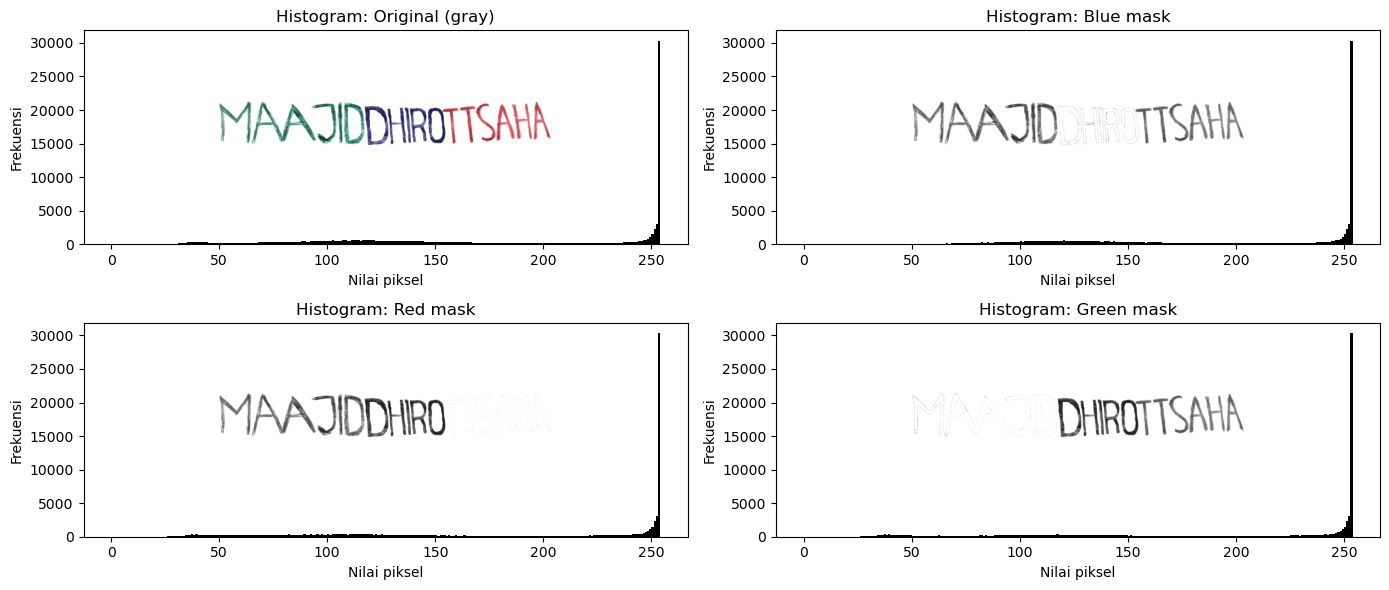

In [20]:
mapping = [
    ('Histogram: Original (gray)', gray, img_rgb),
    ('Histogram: Blue mask', h_blue, h_blue),
    ('Histogram: Red mask', h_red, h_red),
    ('Histogram: Green mask', h_green, h_green),
]
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for (title, data, inset_img), (r, c) in zip(mapping, positions):
    ax = axs[r][c]
    filtered_data = data[data < 255]
    ax.hist(filtered_data.ravel(), bins=254, range=(0, 254), color='black')
    ax.set_title(title)
    ax.set_xlabel('Nilai piksel')
    ax.set_ylabel('Frekuensi')

    axins = ax.inset_axes([0.05, 0.05, 0.9, 0.9])
    if inset_img.ndim == 2:
        axins.imshow(inset_img, cmap='gray')
    else:
        axins.imshow(inset_img)
    axins.axis('off')

plt.tight_layout()
plt.show()


## Histogram tiap warna 

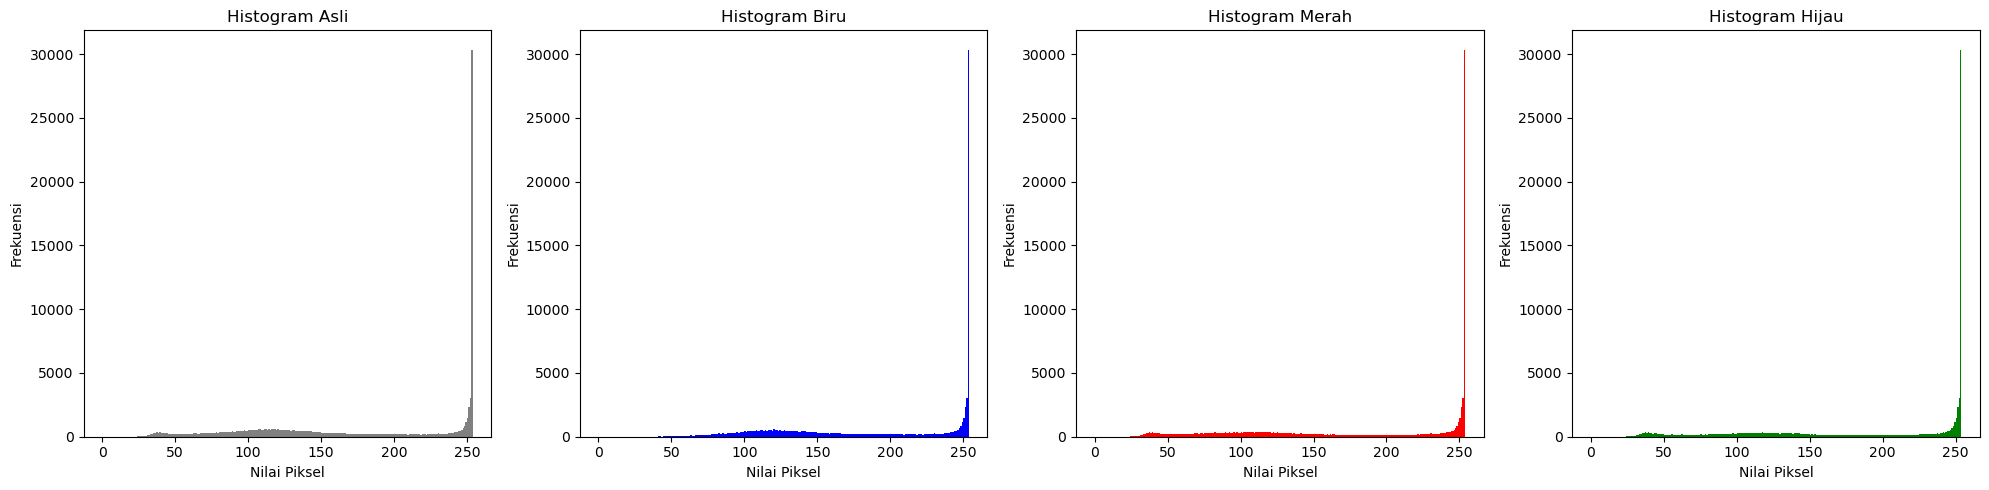

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan konversi ke RGB
img_bgr = cv2.imread('photo1.jpeg')  # Ganti nama file jika perlu
if img_bgr is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 2. Grayscale dan HSV
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 3. Buat mask untuk warna
ranges = {
    'blue':  (np.array([100, 50, 50]), np.array([140, 255, 255])),
    'green': (np.array([30, 40, 40]),  np.array([100, 255, 255])),
    'red1':  (np.array([0, 50, 50]),   np.array([10, 255, 255])),
    'red2':  (np.array([160, 50, 50]), np.array([180, 255, 255]))
}
mask_blue = cv2.inRange(hsv, *ranges['blue'])
mask_green = cv2.inRange(hsv, *ranges['green'])
mask_red = cv2.inRange(hsv, *ranges['red1']) + cv2.inRange(hsv, *ranges['red2'])

# 4. Fungsi untuk highlight hasil masking
def highlight(gray_img, mask):
    out = gray_img.copy()
    out[mask > 0] = 255
    return out

h_blue = highlight(gray, mask_blue)
h_green = highlight(gray, mask_green)
h_red = highlight(gray, mask_red)

# 5. Data mapping: (judul, data, warna_histogram)
mapping = [
    ('Histogram Asli',     gray,    'gray'),
    ('Histogram Biru',     h_blue,  'blue'),
    ('Histogram Merah',    h_red,   'red'),
    ('Histogram Hijau',    h_green, 'green'),
]

# 6. Plot histogram (tanpa inset gambar)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, (title, data, color) in zip(axs, mapping):
    filtered_data = data[data < 255]
    ax.hist(filtered_data.ravel(), bins=254, range=(0, 254), color=color)
    ax.set_title(title)
    ax.set_xlabel('Nilai Piksel')
    ax.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()
